In [11]:
import numpy as np
import pandas as pd

In [12]:
url = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/amazon_fires.csv"
df = pd.read_csv(url, encoding = "ISO-8859-1") 
df

,ano,mes,estado,numero,encontro
0,1998,Janeiro,Acre,0 Fires,1/1/1998
1,1999,Janeiro,Acre,0 Fires,1/1/1999
2,2000,Janeiro,Acre,0 Fires,1/1/2000
3,2001,Janeiro,Acre,0 Fires,1/1/2001
4,2002,Janeiro,Acre,0 Fires,1/1/2002
...,...,...,...,...,...
6449,2012,Dezembro,Tocantins,128,1/1/2012
6450,2013,Dezembro,Tocantins,85,1/1/2013
6451,2014,Dezembro,Tocantins,223,1/1/2014
6452,2015,Dezembro,Tocantins,373,1/1/2015


**Renaming Columns** 

In [13]:
new_columns = {'ano' : 'year','estado': 'state','mes': 'month',
               'numero': 'number_of_fires','encontro': 'date'} 
df.rename(columns = new_columns, inplace=True)
df

,year,month,state,number_of_fires,date
0,1998,Janeiro,Acre,0 Fires,1/1/1998
1,1999,Janeiro,Acre,0 Fires,1/1/1999
2,2000,Janeiro,Acre,0 Fires,1/1/2000
3,2001,Janeiro,Acre,0 Fires,1/1/2001
4,2002,Janeiro,Acre,0 Fires,1/1/2002
...,...,...,...,...,...
6449,2012,Dezembro,Tocantins,128,1/1/2012
6450,2013,Dezembro,Tocantins,85,1/1/2013
6451,2014,Dezembro,Tocantins,223,1/1/2014
6452,2015,Dezembro,Tocantins,373,1/1/2015


**Rearrange Columns**

In [15]:
df.columns

Index(['year', 'month', 'state', 'number_of_fires', 'date'], dtype='object')

In [17]:
df = df[['date','month','year','state', 'number_of_fires']]
df

,date,month,year,state,number_of_fires
0,1/1/1998,Janeiro,1998,Acre,0 Fires
1,1/1/1999,Janeiro,1999,Acre,0 Fires
2,1/1/2000,Janeiro,2000,Acre,0 Fires
3,1/1/2001,Janeiro,2001,Acre,0 Fires
4,1/1/2002,Janeiro,2002,Acre,0 Fires
...,...,...,...,...,...
6449,1/1/2012,Dezembro,2012,Tocantins,128
6450,1/1/2013,Dezembro,2013,Tocantins,85
6451,1/1/2014,Dezembro,2014,Tocantins,223
6452,1/1/2015,Dezembro,2015,Tocantins,373


In [18]:
df.describe()

,year
count,6454.000000
mean,2007.461729
std,5.746654
min,1998.000000
25%,2002.000000
50%,2007.000000
75%,2012.000000
max,2017.000000


**Remove Fires from number_of_fires column**

In [19]:
df['number_of_fires'] = df['number_of_fires'].str.strip(" Fires")
# NEED TO TELL PANDAS THIS IS NOW A NUMBER (INTEGER)
#df['number_of_fires'] = df['number_of_fires'].astype(int) # CRASHES
df

,date,month,year,state,number_of_fires
0,1/1/1998,Janeiro,1998,Acre,0
1,1/1/1999,Janeiro,1999,Acre,0
2,1/1/2000,Janeiro,2000,Acre,0
3,1/1/2001,Janeiro,2001,Acre,0
4,1/1/2002,Janeiro,2002,Acre,0
...,...,...,...,...,...
6449,1/1/2012,Dezembro,2012,Tocantins,128
6450,1/1/2013,Dezembro,2013,Tocantins,85
6451,1/1/2014,Dezembro,2014,Tocantins,223
6452,1/1/2015,Dezembro,2015,Tocantins,373


**Missing data**

In [20]:
df.isnull().sum()

date                 0
month                0
year                 0
state                0
number_of_fires    132
dtype: int64

In [21]:
df = df.dropna() 

In [22]:
df.describe()

,year
count,6322.000000
mean,2007.462670
std,5.747903
min,1998.000000
25%,2002.000000
50%,2007.000000
75%,2012.000000
max,2017.000000


**Convert month names from Portuguese  to English**

In [23]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

months = {'Janeiro': 'January','Fevereiro': 'February','MarÃČÂğo': 'March',
            'Abril': 'April','Maio': 'May','Junho': 'June','Julho': 'July',
            'Agosto':'August','Setembro': 'September','Outubro': 'October',
            'Novembro': 'November','Dezembro':'December'}
months
df["month"] = df["month"].map(months)
df

,date,month,year,state,number_of_fires
0,1/1/1998,January,1998,Acre,0
1,1/1/1999,January,1999,Acre,0
2,1/1/2000,January,2000,Acre,0
3,1/1/2001,January,2001,Acre,0
4,1/1/2002,January,2002,Acre,0
...,...,...,...,...,...
6449,1/1/2012,December,2012,Tocantins,128
6450,1/1/2013,December,2013,Tocantins,85
6451,1/1/2014,December,2014,Tocantins,223
6452,1/1/2015,December,2015,Tocantins,373


## Grouping Data

**Number of entries per state**

In [24]:
number = df.groupby('state').count()
number

,date,month,year,number_of_fires
state,,,,
Acre,234,214,234,234
Amapa,231,212,231,231
Amazonas,234,216,234,234
Bahia,233,213,233,233
Ceara,236,216,236,236
Distrito Federal,234,214,234,234
Espirito Santo,231,211,231,231
Goias,235,215,235,235
Maranhao,235,215,235,235


**Number of fires per state**

In [25]:
total = df.groupby('state')['number_of_fires'].sum()
total

state
Acre                0000010012400010000112000001030050200000251001...
Amapa               0020731381096024203031014192010020212000035021...
Amazonas            0373171581234420371698253637463577065043628262...
Bahia               0114312412543915830322537331417729710117912513...
Ceara               0471113326414338421130416634728832273103115207...
Distrito Federal    0000000000012200011102010100000041011020000000...
Espirito Santo      0362418292228109918574118617575133147610112203...
Goias               0111411224537464192521291418582853460280543294...
Maranhao            0541929484362414502214281213191243262091954944...
Mato Grosso         0394444172896301438947476245527298171166269315...
Minas Gerais        0362418292228109918574118617575133147610112203...
Paraiba             0260115703317883697711546116138754218230211618...
Pernambuco          0102371018829221148156170256491465599109245201...
Piau                0215293386429413312361799939807279929485022120...
Rio           

In [26]:
#CHANGE TO INTEGER
#df['number_of_fires'] = df['number_of_fires'].astype(int)
# CRASHES 
df['number_of_fires'] = df['number_of_fires'].astype(float)
total = df.groupby('state')['number_of_fires'].sum()
total

state
Acre                17971.030
Amapa               20108.576
Amazonas            29890.129
Bahia               43411.951
Ceara               30395.042
Distrito Federal     3501.000
Espirito Santo      37002.276
Goias               23362.852
Maranhao            24839.169
Mato Grosso         95566.975
Minas Gerais        37002.276
Paraiba             51723.918
Pernambuco          22959.000
Piau                37542.651
Rio                 44799.865
Roraima             23749.074
Santa Catarina      23362.852
Sao Paulo           49888.198
Sergipe              3167.000
Tocantins           33441.509
alagoas              4594.000
pará                22124.144
rondonia            19239.429
Name: number_of_fires, dtype: float64

**Fires per month**

In [27]:
mon = df.groupby('month').agg({'number_of_fires': ['sum']})
mon

,number_of_fires
,sum
month,
April,28550.770
August,91619.442
December,57753.459
February,30920.050
January,47043.844
July,89931.720
June,55301.675
May,34154.363


In [28]:
mon = df.groupby('month').agg({'number_of_fires': ['sum','min',
                                    'max','mean','std']})
mon

number_of_fires                                    
                      sum  min    max        mean         std
month                                                        
April           28550.770  0.0  947.0   54.073428  108.719126
August          91619.442  0.0  995.0  174.846263  289.002947
December        57753.459  0.0  956.0  114.137271  162.087125
February        30920.050  0.0  871.0   57.794486  101.503046
January         47043.844  0.0  960.0   88.428278  131.316791
July            89931.720  0.0  989.0  170.972852  250.162517
June            55301.675  0.0  979.0  103.755488  175.849554
May             34154.363  0.0  942.0   64.564013  134.416394
November        87063.812  0.0  995.0  165.520555  218.601142
October         85841.257  0.0  964.0  162.886636  242.427983
September       60071.119  0.0  998.0  113.771059  201.861751

**Sort month name**

In [29]:
order = ['January', 'February', 'March', 'April', 'May', 
         'June', 'July', 'August', 'September', 'October', 
         'November', 'December']
mons= mon.reindex(order, axis=0)
mons

number_of_fires                                    
                      sum  min    max        mean         std
month                                                        
January         47043.844  0.0  960.0   88.428278  131.316791
February        30920.050  0.0  871.0   57.794486  101.503046
March                 NaN  NaN    NaN         NaN         NaN
April           28550.770  0.0  947.0   54.073428  108.719126
May             34154.363  0.0  942.0   64.564013  134.416394
June            55301.675  0.0  979.0  103.755488  175.849554
July            89931.720  0.0  989.0  170.972852  250.162517
August          91619.442  0.0  995.0  174.846263  289.002947
September       60071.119  0.0  998.0  113.771059  201.861751
October         85841.257  0.0  964.0  162.886636  242.427983
November        87063.812  0.0  995.0  165.520555  218.601142
December        57753.459  0.0  956.0  114.137271  162.087125

**Which state has the most fires on average?**


In [30]:
ave = df.groupby('state').mean()
ave.sort_values(by=['number_of_fires'],
                    ascending=False)

,year,number_of_fires
state,,
Sao Paulo,2007.440678,211.390669
Mato Grosso,2007.508475,202.472405
Bahia,2007.463519,186.317386
Piau,2007.493562,161.127258
Minas Gerais,2007.467532,160.183013
Espirito Santo,2007.467532,160.183013
Tocantins,2007.454936,143.525790
Ceara,2007.364407,128.792551
Amazonas,2007.376068,127.735594


In [31]:
state = df.groupby(['state','month']).agg({'number_of_fires': ['sum','min',
                                    'max','mean','std']})
state

number_of_fires                                         
                               sum     min      max        mean         std
state    month                                                             
Acre     April              41.000   0.000   19.000    2.157895    4.425471
         August           6393.034   1.100  960.000  319.651700  336.205557
         December           47.000   0.000    8.000    2.473684    2.893833
         February           19.000   0.000    5.000    0.950000    1.637553
         January            40.000   0.000   12.000    2.000000    4.142209
...                            ...     ...      ...         ...         ...
rondonia June             1532.000  10.000  192.000   80.631579   60.745563
         May               350.000   0.000   54.000   18.421053   16.422599
         November         3642.002   1.002  526.000  202.333444  174.478584
         October          3332.381   1.063  822.000  166.619050  300.017346
         September         104.203   1.776   13.972    5.210150    3.604627

[253 rows x 5 columns]

## Plots of Distributions

**Minimum Working Barplot**

In [32]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(6.5,4))
#plt.bar(mons['month'],mons['mean'])
#plt.show()
mons.columns

MultiIndex([('number_of_fires',  'sum'),
            ('number_of_fires',  'min'),
            ('number_of_fires',  'max'),
            ('number_of_fires', 'mean'),
            ('number_of_fires',  'std')],
           )

Barplot doesn’t work because of the MultiIndex format generated by groupby. Let's fix this

In [33]:
mons2 = mons.droplevel(level=0,axis=1)
mons2.insert(0, 'month', mons.index)
mons.index.names = ['index']
mons2.columns

Index(['month', 'sum', 'min', 'max', 'mean', 'std'], dtype='object')

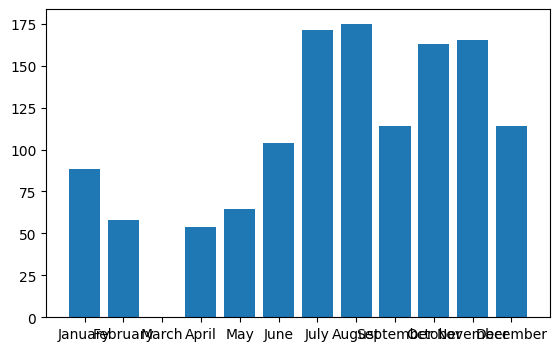

In [309]:
plt.figure(figsize=(6.5,4))
plt.bar(mons2['month'],mons2['mean'])
plt.show()

**Works now but let's do as function so it can be re-used**

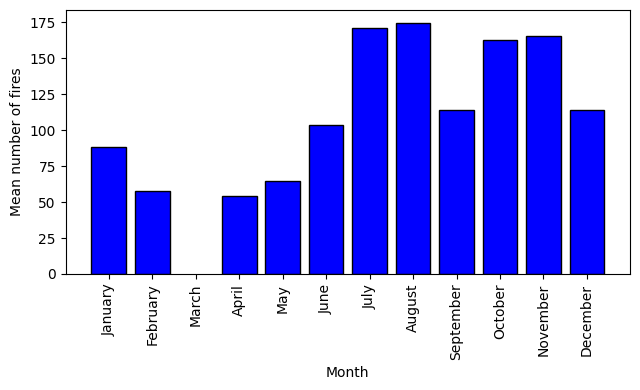

In [34]:
def barplot(data,xpara,ypara,xlabel,ylabel,rot):
    plt.figure(figsize=(6.5,4))
    plt.bar(data[xpara],data[ypara], facecolor = 'b', edgecolor ='k')
    plt.xticks(rotation=rot)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 
    plt.tight_layout()
    #plt.savefig("Fires-%s_%s.png" %(xpara,ypara)) # HARD COPY
    plt.show()
barplot(mons2,'month','mean','Month','Mean number of fires',90)

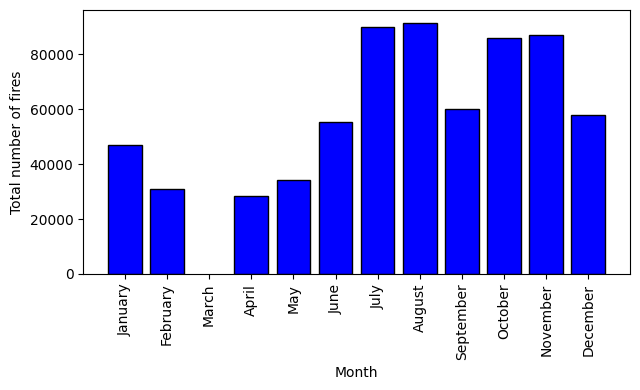

In [339]:
barplot(mons2,'month','sum','Month','Total number of fires',90)

## Time Series

**Convert to datetime object**

In [36]:
df['Date'] = pd.to_datetime(df['date'], format='%d/%m/%Y') 
#df # BIG Y FOR FULL YEAR, y IF E.G. 1/2/12
type(df['Date']) #MMMM

pandas.core.series.Series

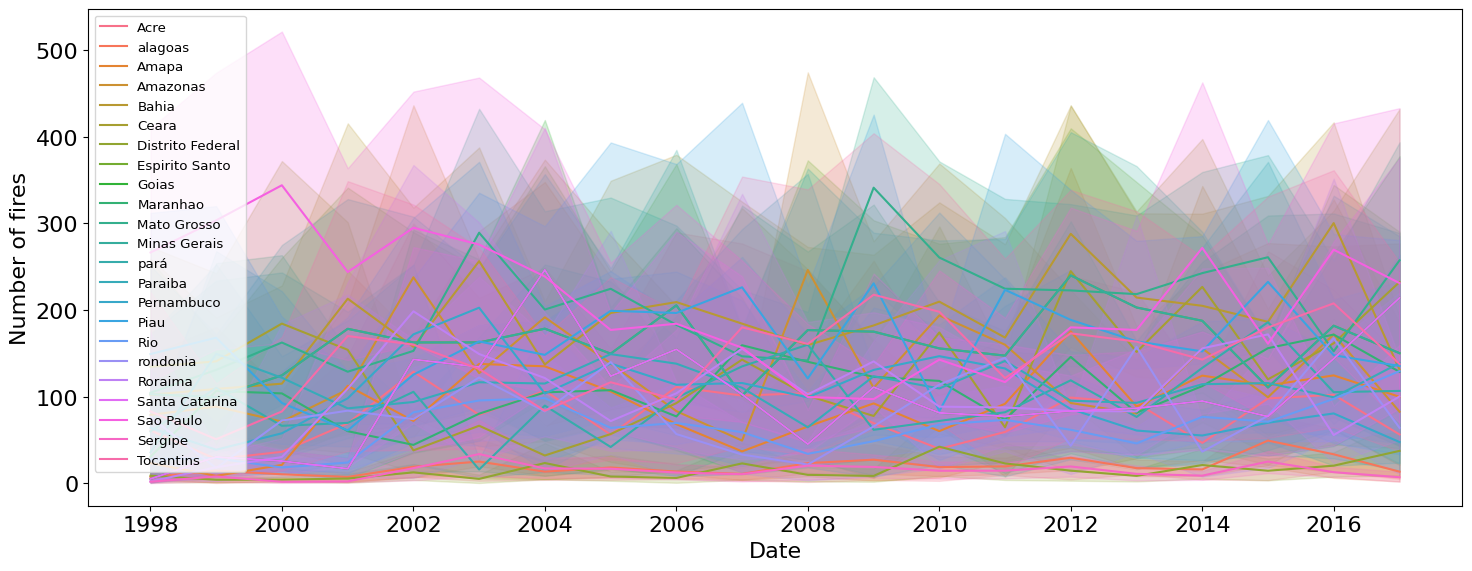

In [37]:
import seaborn as sns
font = 16
plt.rcParams.update({'font.size': font})
plt.figure(figsize=(15,6))
sns.lineplot(x = df["Date"], y = df["number_of_fires"], hue = df['state'])
plt.xlabel('Date')
plt.ylabel('Number of fires')
plt.legend(loc = 'upper left', fontsize = 0.6*font)
plt.tight_layout()
#plt.savefig("Fires.png") # HARD COPY
plt.show()

**Combine all regions**

In [38]:
df1 = df.copy() # # TO SAVE GOING ALL THE WAY BACK TO df (JUPYTER)
df1
#comb = df1.groupby(['Date']).agg({'number_of_fires':['sum','mean']})
#comb

,date,month,year,state,number_of_fires,Date
0,1/1/1998,January,1998,Acre,0.0,1998-01-01
1,1/1/1999,January,1999,Acre,0.0,1999-01-01
2,1/1/2000,January,2000,Acre,0.0,2000-01-01
3,1/1/2001,January,2001,Acre,0.0,2001-01-01
4,1/1/2002,January,2002,Acre,0.0,2002-01-01
...,...,...,...,...,...,...
6449,1/1/2012,December,2012,Tocantins,128.0,2012-01-01
6450,1/1/2013,December,2013,Tocantins,85.0,2013-01-01
6451,1/1/2014,December,2014,Tocantins,223.0,2014-01-01
6452,1/1/2015,December,2015,Tocantins,373.0,2015-01-01


In [39]:
# Less dates than expected, check
df1['date'].unique()
len(df1['date'].unique()) # YEP, ONLY 20 - 1 JAN, SO WHERE'S THE OTHERS?

20

In [40]:
#CHECK - YEP date COLUMN IS UNRELIABLE
df1[df1['month'] == 'May']

,date,month,year,state,number_of_fires,Date
80,1/1/1998,May,1998,Acre,0.0,1998-01-01
81,1/1/1999,May,1999,Acre,0.0,1999-01-01
82,1/1/2000,May,2000,Acre,1.0,2000-01-01
83,1/1/2001,May,2001,Acre,0.0,2001-01-01
84,1/1/2002,May,2002,Acre,0.0,2002-01-01
...,...,...,...,...,...,...
6310,1/1/2013,May,2013,Tocantins,373.0,2013-01-01
6311,1/1/2014,May,2014,Tocantins,618.0,2014-01-01
6312,1/1/2015,May,2015,Tocantins,512.0,2015-01-01
6313,1/1/2016,May,2016,Tocantins,778.0,2016-01-01


**That's not right - opportunity to show more cleaning (dates are always 'fun')**

**Fix Dates**

In [41]:
df2 = df1.copy() # TO SAVE GOING BACK TO DEFINING df1
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 
              'November': 11, 'December': 12}

df2['month_no'] = df2['month'].map(month_map); #df2
df2.dropna(inplace = True) # IN CASE ALL THE NaN FOR MARCH CAUSE PROBLEMS
df2['month_no'] = df2['month_no'].astype(int);#df2 
df2['month_name'] = df2['month'] # to_datetime NEEDS SPECIFIC FORMAT
df2['month'] = df2['month_no'];#df2
df2['Date'] = pd.to_datetime(df2[['year','month']].assign(day=1))
del df2['date']
df2

,month,year,state,number_of_fires,Date,month_no,month_name
0,1,1998,Acre,0.0,1998-01-01,1,January
1,1,1999,Acre,0.0,1999-01-01,1,January
2,1,2000,Acre,0.0,2000-01-01,1,January
3,1,2001,Acre,0.0,2001-01-01,1,January
4,1,2002,Acre,0.0,2002-01-01,1,January
...,...,...,...,...,...,...,...
6449,12,2012,Tocantins,128.0,2012-12-01,12,December
6450,12,2013,Tocantins,85.0,2013-12-01,12,December
6451,12,2014,Tocantins,223.0,2014-12-01,12,December
6452,12,2015,Tocantins,373.0,2015-12-01,12,December


In [42]:
df3 = df2.groupby(['Date']).agg({'number_of_fires':
                                 ['sum','mean']})
#len(df3)

In [66]:
# THAT'S MORE LIKE IT, BUT AFTER groupby HAVE TO DEAL WITH COLUMN NAMES 
#df3.head()
df4 = df3.droplevel(level=0,axis=1)
df4.insert(0, 'Date', df3.index)
df4.index.names = ['index']
start = pd.to_datetime('1998-01-01') # THis WILL BE USEFUL FOR THE PLOT
df4['Days'] = (df4['Date'] - start).dt.days
df4['Years'] = df4['Days']/365.25
df4.tail()

,Date,sum,mean,Days,Years
index,,,,,
2017-07-01,2017-07-01,6548.601,251.869269,7121,19.496235
2017-08-01,2017-08-01,4804.060,177.928148,7152,19.581109
2017-09-01,2017-09-01,3348.776,124.028741,7183,19.665982
2017-10-01,2017-10-01,3127.820,120.300769,7213,19.748118
2017-11-01,2017-11-01,6385.379,236.495519,7244,19.832991


**Plot the data - note that code for a linear fit and significance testing has been added**

**Also a secondary axes, making it easy to read the year, although this is not necessary**

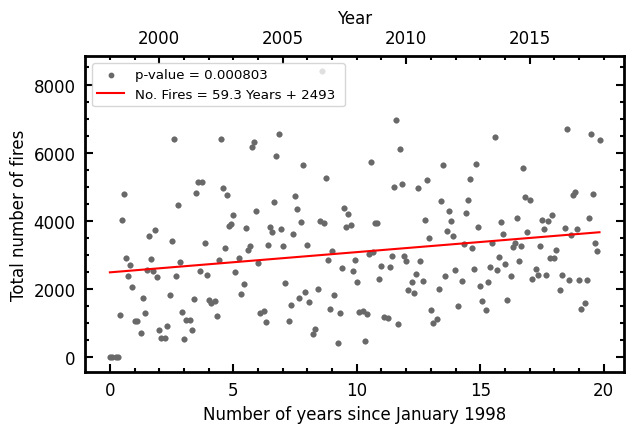

In [71]:
from scipy import stats # LOOK AT CORRELATION
import matplotlib.ticker as ticker  # TO CONTROL TICK SPACING - NOT NECESSARY


def all_plot(xpara,ypara,xlabel,ylabel):
    font = 12
    plt.rcParams.update({'font.size': font})
    plt.figure(figsize=(6.5,4.5))
    ax = plt.gca()  # TO ALL SECONDARY AXIS - NOT NECESSARY
    plt.setp(ax.spines.values(), linewidth=2)
    
    ## ADJUSTING TICKS - NOT NECESSARY
    ax.tick_params(direction='in', pad = 7,length=6, width=1.5, which='major',right=True)
    ax.tick_params(direction='in', pad = 7,length=3, width=1.5, which='minor',right=True)
    
    plt.scatter(df4[xpara],df4[ypara],s=10,c='dimgrey')
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    
    ## TICK SPACING - NOT NECESSARY
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5)) 
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(500)) 
    
    ############ FIT DATA ############
    x = df4[xpara].astype('int64') # TO CONVERT DATE OBJECT
    y = df4[ypara]
    M,C = np.polyfit(x, y, deg=1); #print(M,C)
    # GRADIENT AND INTERCEPT - 1st SET UP 10 EVENLY SPACED POINTS ALONG X-AXIS
    xs = np.linspace(df4[xpara].min(),df4[xpara].max(),10)
    # STATS
    tau, p_value = stats.kendalltau(x, y); #print(p_value)
    
    # PLOT DOWN HERE SO p_value CAN BE PUT IN LEGEND
    plt.scatter(df4[xpara],df4[ypara],s=10,c='dimgrey',
                    label = 'p-value = %1.3g' %(p_value))

    plt.plot(xs,M*xs+C,c='r', label = 'No. Fires = %1.1f %s + %1.0f ' 
                         %(M,xpara,C))
    ############ SECONDARY AXIS (NOT NECESSARY) ###############
    def years2date(z):
        return z +  1998.0
    def date2years(z):
        return z-1998.0
    secax = ax.secondary_xaxis('top', functions=(years2date,date2years)) 
    
    secax.tick_params(direction='in', pad = 7,length=6, width=1.5, which='major')
    secax.tick_params(direction='in', pad = 7,length=3, width=1.5, which='minor')
    
    secax.set_xlabel('Year')
    secax.xaxis.set_major_locator(ticker.MultipleLocator(5)) 
    secax.xaxis.set_minor_locator(ticker.MultipleLocator(1)) 
    #############################################################
    plt.legend(loc = 'upper left', fontsize = 0.8*font)
    plt.tight_layout()
    #plt.savefig('Fires_scatter-%s-%s.png' %(xpara,ypara)) # HARD COPY
    plt.show()
#all_plot('Date','sum','Date','Total number of fires') # HARD TO SHOW FIT
all_plot('Years','sum','Number of years since January 1998','Total number of fires')
#all_plot('Years','mean','Numeber of years since January 1998','Average number of fires')